In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4423680/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
latent_dim = 64 

In [7]:
class Autoencoder(Model):
    
    def __init__(self, latent_dim):     
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
          layers.Flatten(),
          layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
          layers.Dense(784, activation='sigmoid'),
          layers.Reshape((28, 28))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [8]:
autoencoder = Autoencoder(latent_dim)

In [9]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [10]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0243 - val_loss: 0.0134
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0119 - val_loss: 0.0109
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0098 - val_loss: 0.0097
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

In [11]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

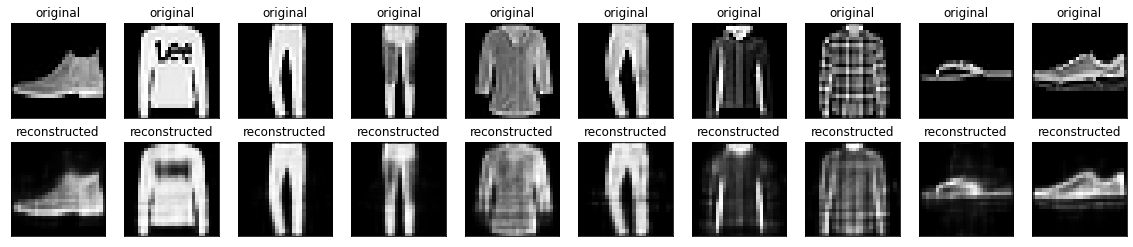

In [12]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
# 降噪

In [14]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [15]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


In [16]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

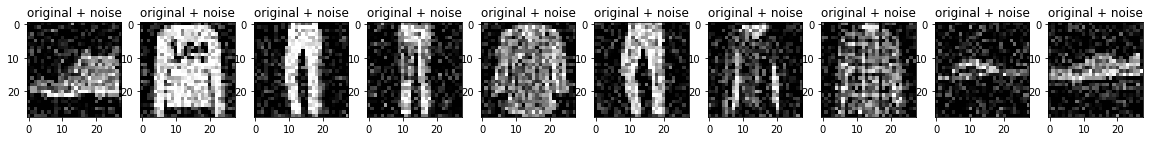

In [17]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [18]:
autoencoder = Autoencoder(latent_dim)

In [19]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [23]:
autoencoder.fit(x_train_noisy, x_train_noisy,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0273 - val_loss: 0.0145
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0273 - val_loss: 0.0146
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0273 - val_loss: 0.0148
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0273 - val_loss: 0.0147
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0273 - val_loss: 0.0147
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0272 - val_loss: 0.0146
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0272 - val_loss: 0.0145
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0272 - val_loss: 0.0147
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0272 - val_loss: 0.0147
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.027

In [24]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

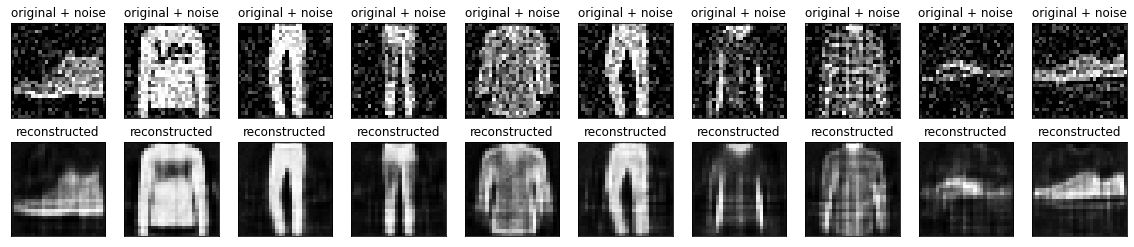

In [25]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()